In [3]:
import matplotlib.pyplot as plt
import networkx as nx

players = ['A', 'B', 'C', 'D']
resources = ['1', '2', '3', '4']
epsilon = 1e-8


def draw_graph(B, iteration):
    left_nodes = [n for n in B.nodes if n in players]
    right_nodes = [n for n in B.nodes if n not in players]

    pos = {}
    for i, node in enumerate(sorted(left_nodes)):
        pos[node] = (0, -i)
    for i, node in enumerate(sorted(right_nodes)):
        pos[node] = (1, -i)

    plt.figure(figsize=(6, 4))
    nx.draw(B, pos, with_labels=True, node_color='lightblue', edge_color='gray', node_size=800)
    labels = nx.get_edge_attributes(B, 'weight')
    labels = {k: round(v, 2) for k, v in labels.items()}
    nx.draw_networkx_edge_labels(B, pos, edge_labels=labels)
    plt.title(f"Iteration {iteration}")
    plt.axis('off')
    plt.show()


def birkhoff_decomposition(B):
    matchings = []

    draw_graph(B, len(matchings))

    while B.number_of_edges() > 0:
        M = nx.algorithms.matching.max_weight_matching(B, maxcardinality=True)
        p = round(min(B[u][v]['weight'] for u, v in M), 10)

        matchings.append((M, p))
        for u, v in M:
            B[u][v]['weight'] -= p
            if B[u][v]['weight'] < epsilon:
                B.remove_edge(u, v)

        draw_graph(B, len(matchings))

    return matchings

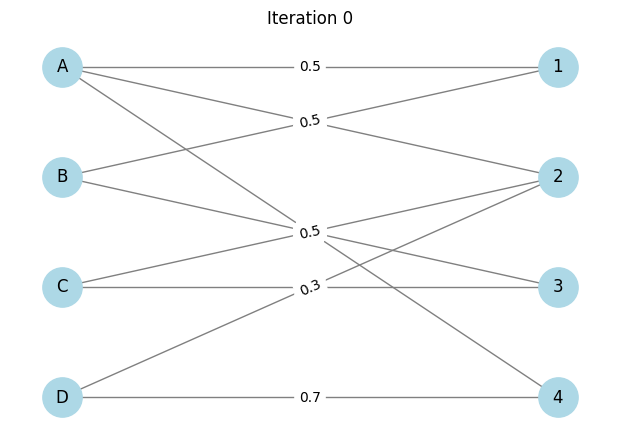

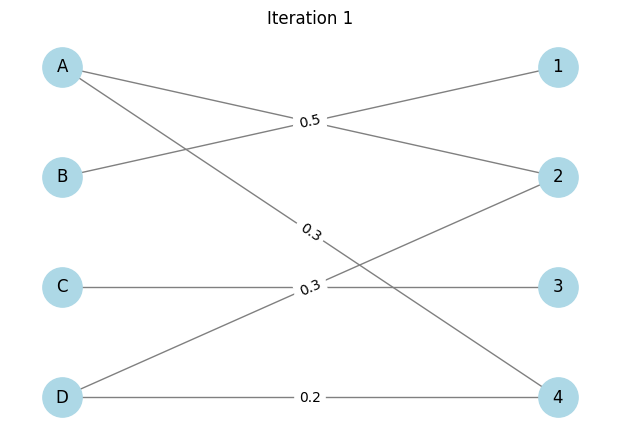

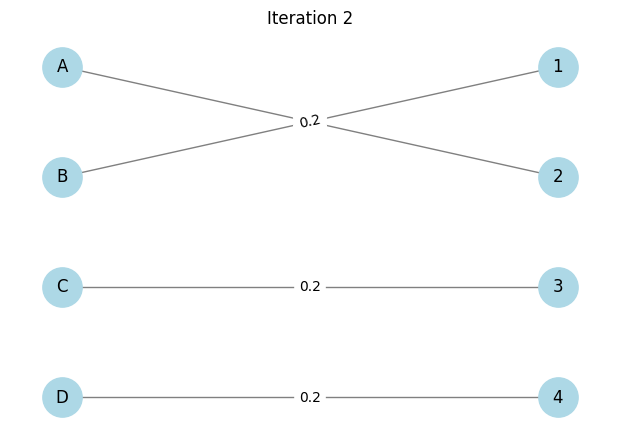

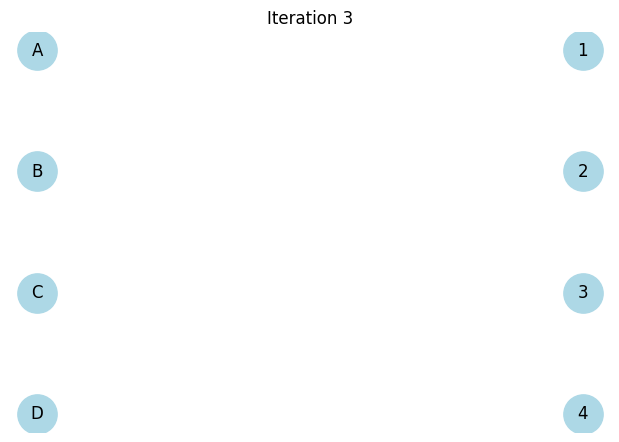

Weight 0.5, Matching: [('B', '3'), ('D', '4'), ('A', '1'), ('C', '2')]
Weight 0.3, Matching: [('A', '4'), ('C', '3'), ('B', '1'), ('D', '2')]
Weight 0.2, Matching: [('D', '4'), ('C', '3'), ('B', '1'), ('A', '2')]


In [4]:
# Initialize graph
B = nx.Graph()
B.add_nodes_from(players, bipartite=0)
B.add_nodes_from(resources, bipartite=1)
edges = [
    ('A', '1', 0.5),
    ('A', '2', 0.2),
    ('A', '4', 0.3),
    ('B', '1', 0.5),
    ('B', '3', 0.5),
    ('C', '2', 0.5),
    ('C', '3', 0.5),
    ('D', '2', 0.3),
    ('D', '4', 0.7),
]
B.add_weighted_edges_from(edges)

# Run decomposition
decomposition = birkhoff_decomposition(B)
for match, p in decomposition:
    print(f"Weight {round(p, 2)}, Matching: {[(u,v) if u in players else (v,u) for u,v in match]}")